In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("../data/Car Sales.xlsx - car_data.csv")

In [71]:
df.isnull().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price            0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [64]:
df["Date"] = pd.to_datetime(df["Date"])
df.rename(columns={"Price ($)": "Price"}, inplace=True)

In [65]:
num_companies = df["Company"].nunique()


num_companies

30

In [67]:
num_dates = df["Date"].nunique()
num_dates

612

In [66]:
sales_summary_date_company = df.groupby(["Date", "Company"]).agg(
    Total_Sales=("Price", "sum"),
    Sales_Count=("Company", "size")
).reset_index()


sales_summary_date_company

,Date,Company,Total_Sales,Sales_Count
0,2022-01-02,Acura,55500,2
1,2022-01-02,Audi,12000,1
2,2022-01-02,BMW,15000,1
3,2022-01-02,Buick,19000,1
4,2022-01-02,Cadillac,62500,2
...,...,...,...,...
10484,2023-12-31,Pontiac,43000,1
10485,2023-12-31,Saab,26000,1
10486,2023-12-31,Subaru,49000,1
10487,2023-12-31,Toyota,49001,2


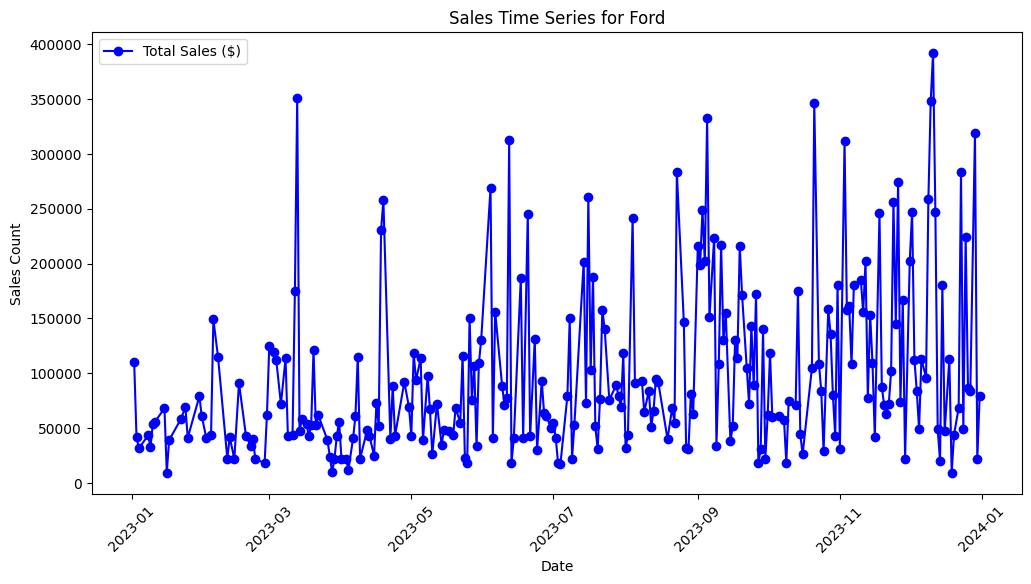

In [ ]:
company_name = "Ford" 
sales_summary_filtered = sales_summary_date_company[
    sales_summary_date_company["Company"] == company_name]
sales_summary_filtered = sales_summary_filtered[sales_summary_filtered["Date"].dt.year == 2023]



plt.figure(figsize=(12, 6))

plt.plot(sales_summary_filtered["Date"], sales_summary_filtered["Total_Sales"],
         label="Total Sales ($)", color="blue", marker="o")

# Plot Sales Count over time (optional)
# plt.plot(sales_summary_filtered["Date"], sales_summary_filtered["Sales_Count"],
#          label="Sales Count", color="red", linestyle="dashed", marker="s")

plt.xlabel("Date")
plt.ylabel("Sales Count")
plt.title(f"Sales Time Series for {company_name}")
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.show()

In [75]:
categorical_columns = ["Model", "Engine", "Transmission",
                       "Color", "Dealer_Name", "Body Style", "Dealer_Region"]

one_hot_encoded = pd.get_dummies(df[categorical_columns], dtype=int)

one_hot_encoded["Date"] = df["Date"]
one_hot_encoded["Company"] = df["Company"]

one_hot_summary = one_hot_encoded.groupby(
    ["Date", "Company"]).sum().reset_index()

# Merge the aggregated one-hot encoding with sales_summary_date_company
df_date_company_ohe = pd.merge(sales_summary_date_company, one_hot_summary, on=[
    "Date", "Company"])
df_date_company_ohe

,Date,Company,Total_Sales,Sales_Count,Model_3-Sep,Model_3000GT,Model_300M,Model_323i,Model_328i,Model_4Runner,...,Body Style_Passenger,Body Style_SUV,Body Style_Sedan,Dealer_Region_Aurora,Dealer_Region_Austin,Dealer_Region_Greenville,Dealer_Region_Janesville,Dealer_Region_Middletown,Dealer_Region_Pasco,Dealer_Region_Scottsdale
0,2022-01-02,Acura,55500,2,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
1,2022-01-02,Audi,12000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2022-01-02,BMW,15000,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2022-01-02,Buick,19000,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,2022-01-02,Cadillac,62500,2,0,0,0,0,0,0,...,2,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10484,2023-12-31,Pontiac,43000,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
10485,2023-12-31,Saab,26000,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
10486,2023-12-31,Subaru,49000,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
10487,2023-12-31,Toyota,49001,2,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0


In [78]:
# rename columns
df_date_company_ohe.columns = df_date_company_ohe.columns.str.replace(
    "Model_3-Sep", "Model_3-9")
df_date_company_ohe.columns = df_date_company_ohe.columns.str.replace(
    "Model_5-Sep", "Model_5-9")

df_date_company_ohe

,Date,Company,Total_Sales,Sales_Count,Model_3-9,Model_3000GT,Model_300M,Model_323i,Model_328i,Model_4Runner,...,Body Style_Passenger,Body Style_SUV,Body Style_Sedan,Dealer_Region_Aurora,Dealer_Region_Austin,Dealer_Region_Greenville,Dealer_Region_Janesville,Dealer_Region_Middletown,Dealer_Region_Pasco,Dealer_Region_Scottsdale
0,2022-01-02,Acura,55500,2,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
1,2022-01-02,Audi,12000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2022-01-02,BMW,15000,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2022-01-02,Buick,19000,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,2022-01-02,Cadillac,62500,2,0,0,0,0,0,0,...,2,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10484,2023-12-31,Pontiac,43000,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
10485,2023-12-31,Saab,26000,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
10486,2023-12-31,Subaru,49000,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
10487,2023-12-31,Toyota,49001,2,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0


In [80]:

file_path = "../data/car_sales_date_company_ohe.csv"

# Save the DataFrame as a CSV file
df_date_company_ohe.to_csv(file_path, index=False)